# Import Libraries

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import probplot, boxcox
from scipy.special import inv_boxcox
import pylab

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import Ridge, Lasso, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
#from catboot import CatBoostRegressor
# from lightghbm import LGBMRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, r2_score



Load data

In [71]:
data = pd.read_csv('./House_Rent_Dataset.csv')
data

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [73]:
data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [74]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

# Exploratory Data Analysis(EDA)

c:\Users\B\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



KeyboardInterrupt: 

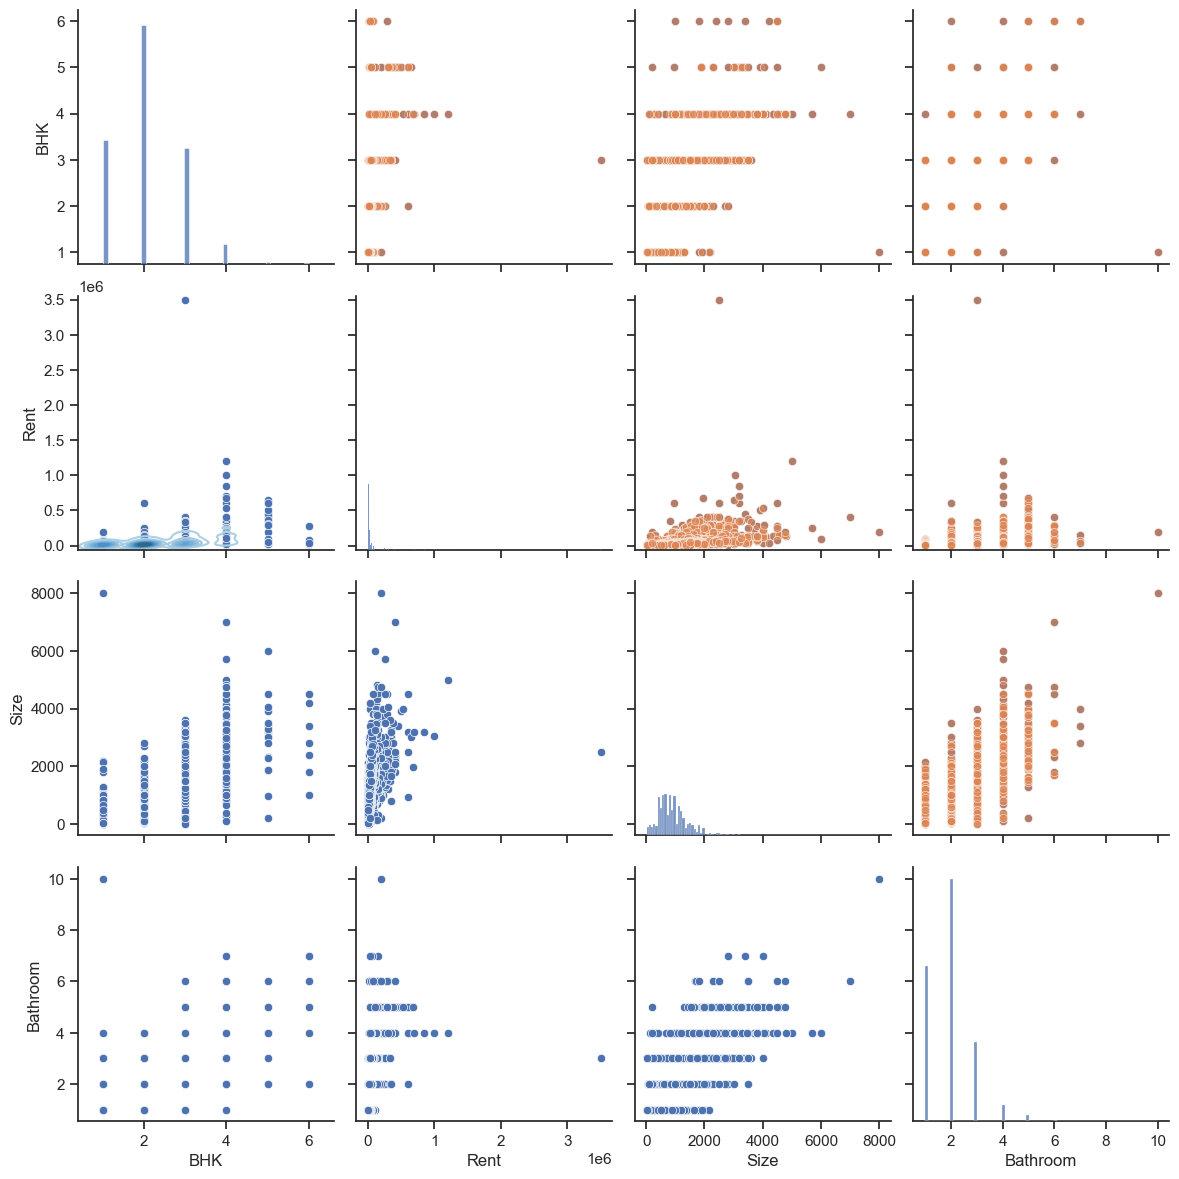

In [75]:
sns.set(style='ticks')

g = sns.pairplot(data, height=3)
g.map_upper(sns.scatterplot, alpha=0.7)
g.map_lower(sns.kdeplot, cmap='Blues_d')
g.map_diag(sns.histplot, kde_kws={'color': 'R'})

plt.tight_layout()
plt.show()

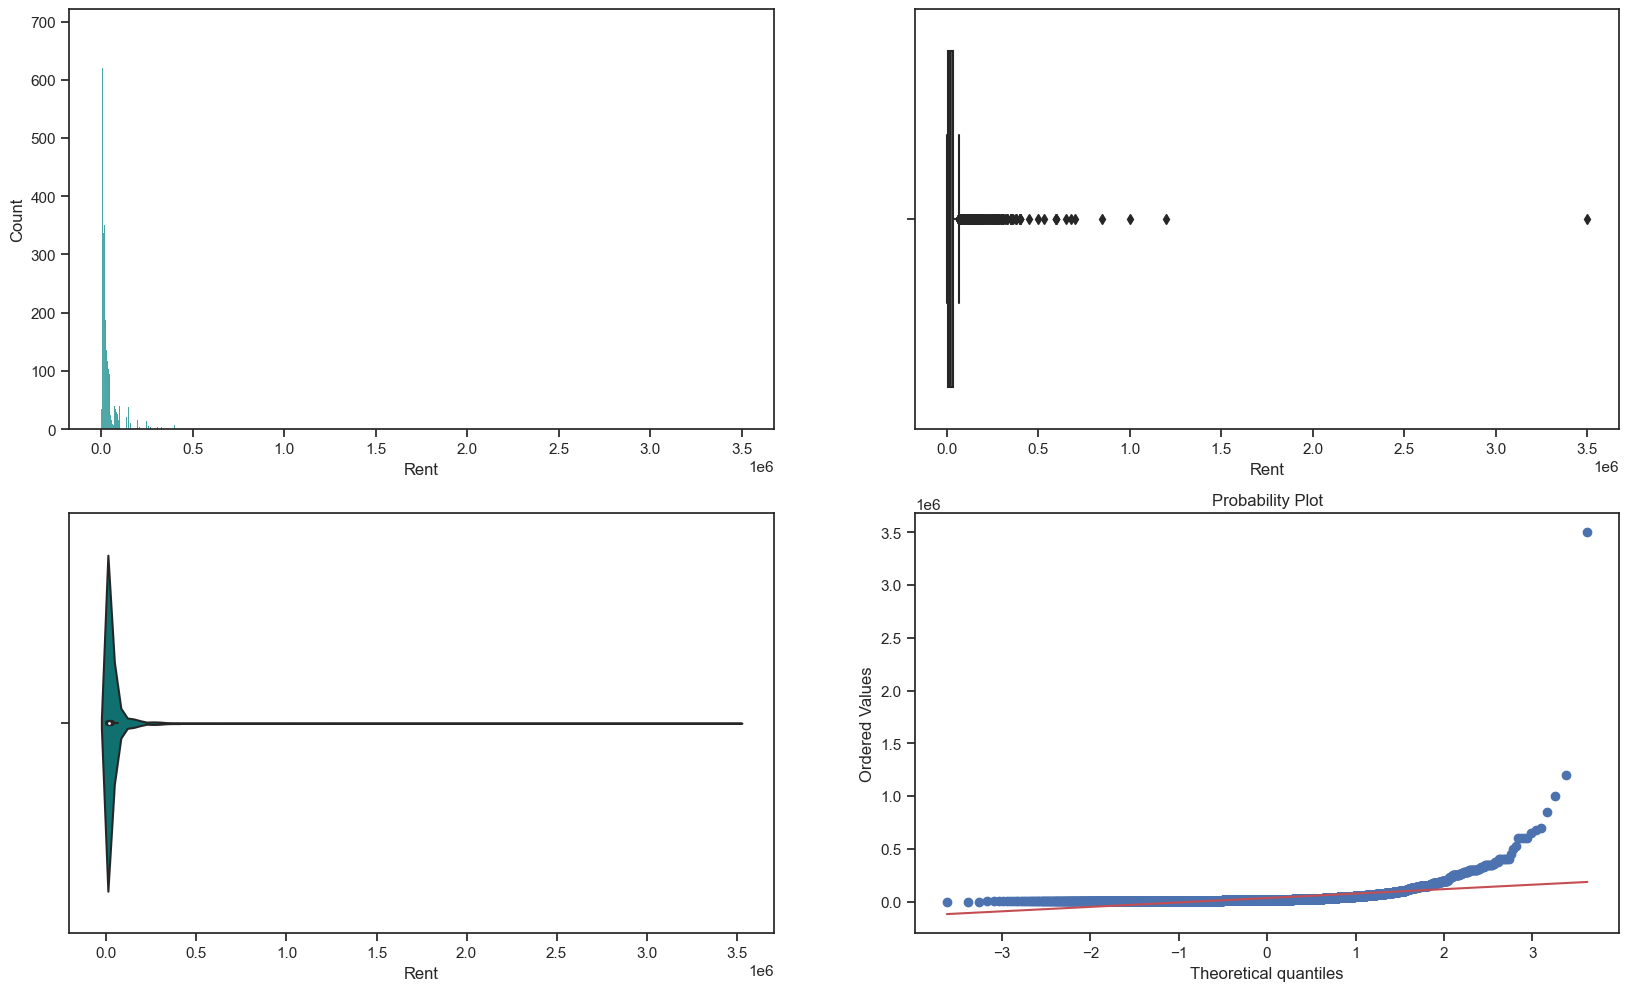

In [ ]:
fig,ax =plt.subplots(2,2, figsize= (20,12))
ax1 = sns.histplot(x= data['Rent'], color='teal', ax=ax[0,0])
ax2 = sns.boxplot(x=data['Rent'], ax=ax[0,1], color='teal')
ax3 = sns.violinplot(x= data['Rent'], ax= ax[1,0], color='teal')
ax4= probplot(data['Rent'], plot=pylab)
pylab.show()

In [ ]:
max_rent = data['Rent'].max()
index_max_rent = data[data['Rent'] == max_rent].index
data = data.drop(index_max_rent)

bc_result = boxcox(data['Rent'])
boxcoc_y = bc_result[0]
lam= bc_result[1]

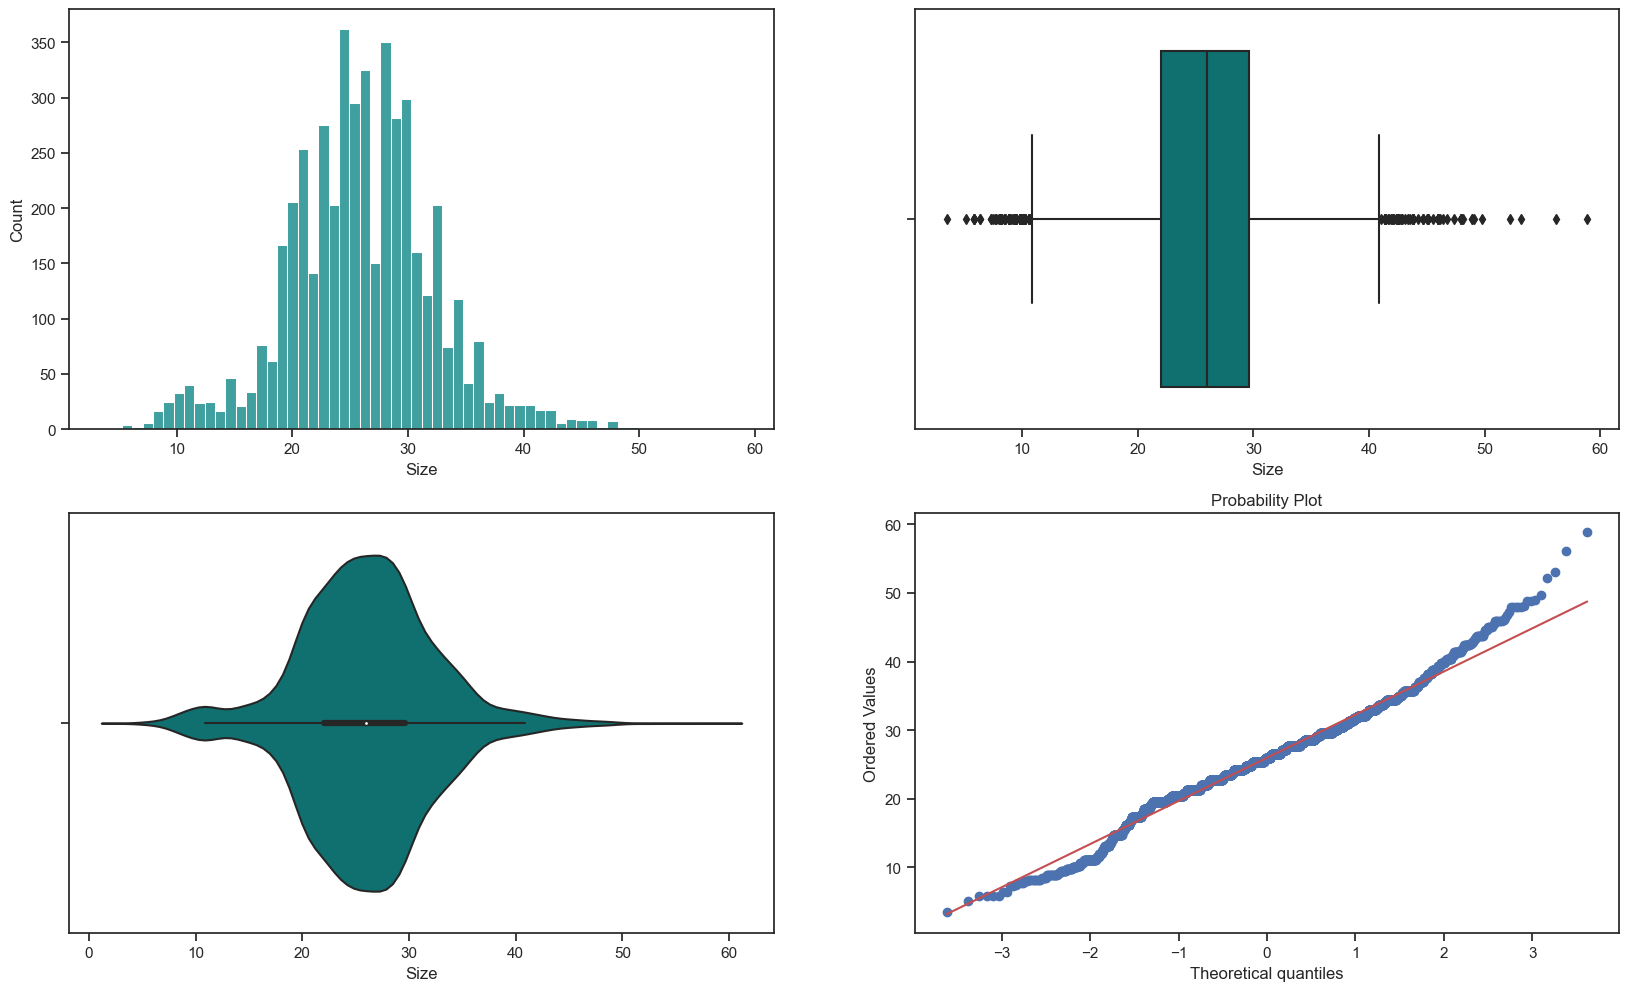

In [ ]:
data['Size'] = boxcox(data['Size'])[0]
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
ax1 = sns.histplot(x = data['Size'], color='teal', ax= ax[0, 0])
ax2 = sns.boxplot(x = data['Size'], ax= ax[0, 1], color= 'teal')
ax3 = sns.violinplot(x = data['Size'], ax= ax[1, 0], color= 'teal')
ax4 = probplot(data['Size'], plot=pylab)
pylab.show()

BHK

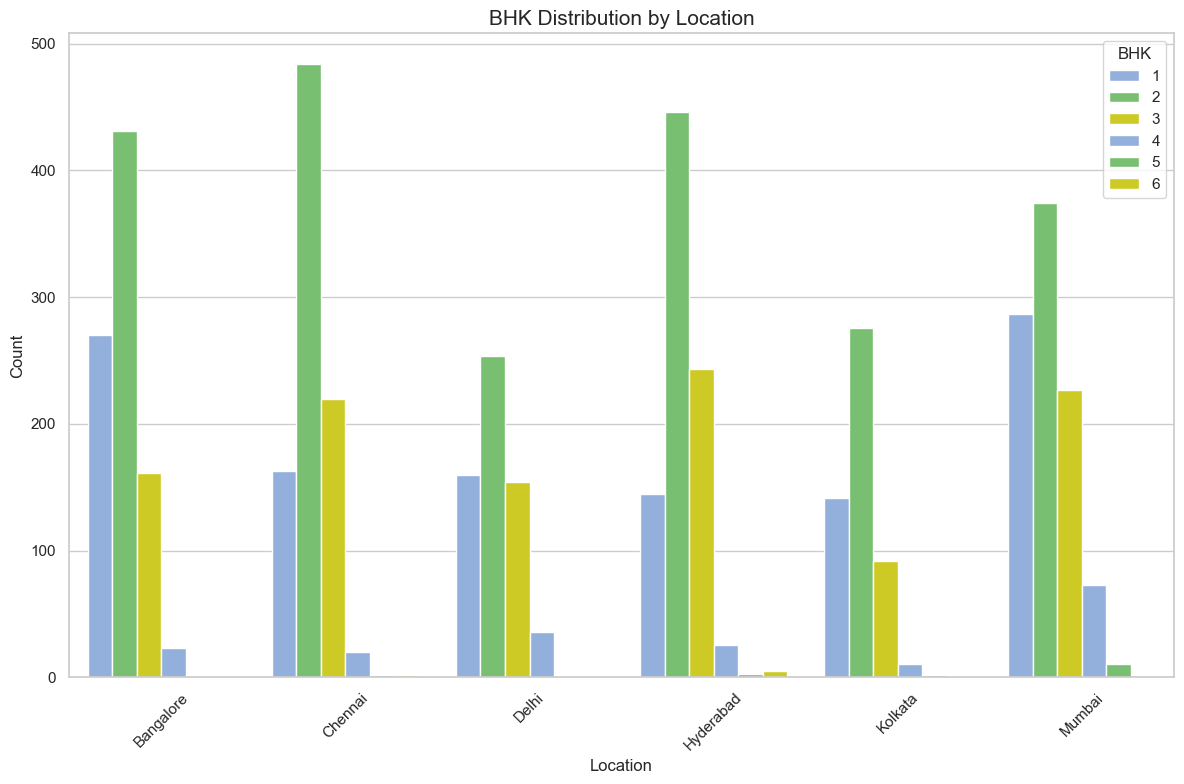

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))

palette = ['#87ace8', '#6ecc64', '#EAE509']
ax = sns.barplot(x='City', y='count', hue='BHK', data=data.groupby(['City', 'BHK']).size().reset_index(name='count'), palette=palette)
ax.set_title('BHK Distribution by Location', fontsize=15)
ax.set_xlabel('Location')
ax.set_ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='BHK')
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


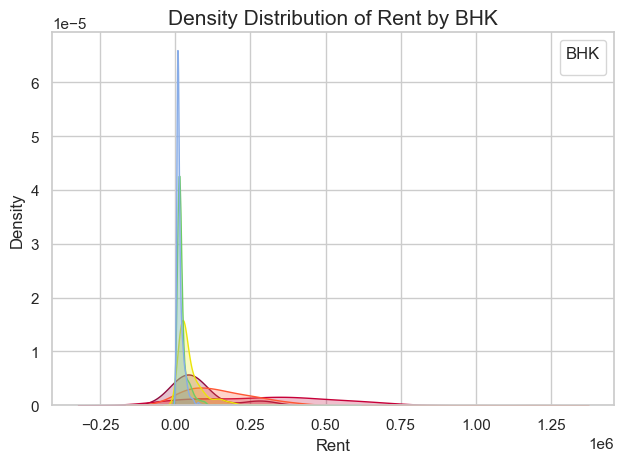

In [ ]:
palette1 = ['#87ace8', '#6ecc64', '#EAE509', '#FF5733', '#C70039', '#900C3F'] 
ax = sns.kdeplot(data=data, x='Rent', hue='BHK', common_norm=False, fill=True, palette=palette1)
ax.set_title('Density Distribution of Rent by BHK', fontsize=15)
ax.set_xlabel('Rent')
ax.set_ylabel('Density')
plt.legend(title='BHK')
plt.tight_layout()
plt.show()

BATHROOM

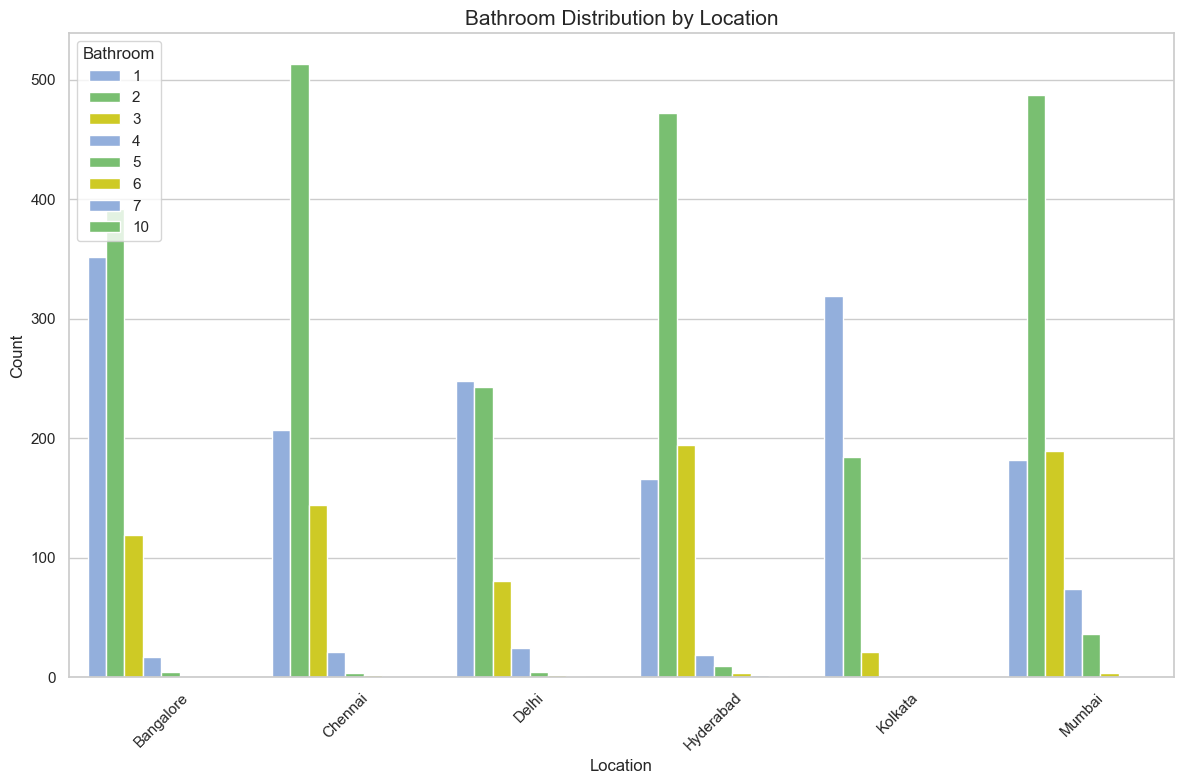

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))

palette = ['#87ace8', '#6ecc64', '#EAE509']
ax = sns.barplot(x='City', y='count', hue='Bathroom', data=data.groupby(['City', 'Bathroom']).size().reset_index(name='count'), palette=palette)
ax.set_title('Bathroom Distribution by Location', fontsize=15)
ax.set_xlabel('Location')
ax.set_ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Bathroom')
plt.tight_layout()
plt.show()

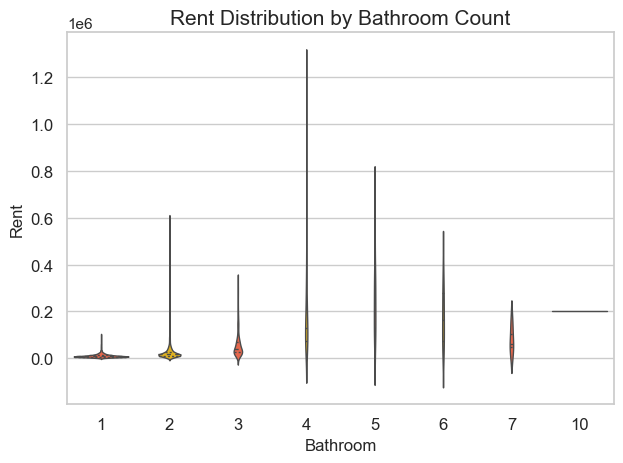

In [ ]:
custom_palette = ['#FF5733', '#FFC300', '#FF5733', '#FFC300', '#FF5733', '#FFC300']
ax = sns.violinplot(data=data, x='Bathroom', y='Rent', palette=custom_palette, inner='quartiles', linewidth=1, width=0.8)
ax.set_title('Rent Distribution by Bathroom Count', fontsize=15)
ax.set_xlabel('Bathroom')
ax.set_ylabel('Rent')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

CITY

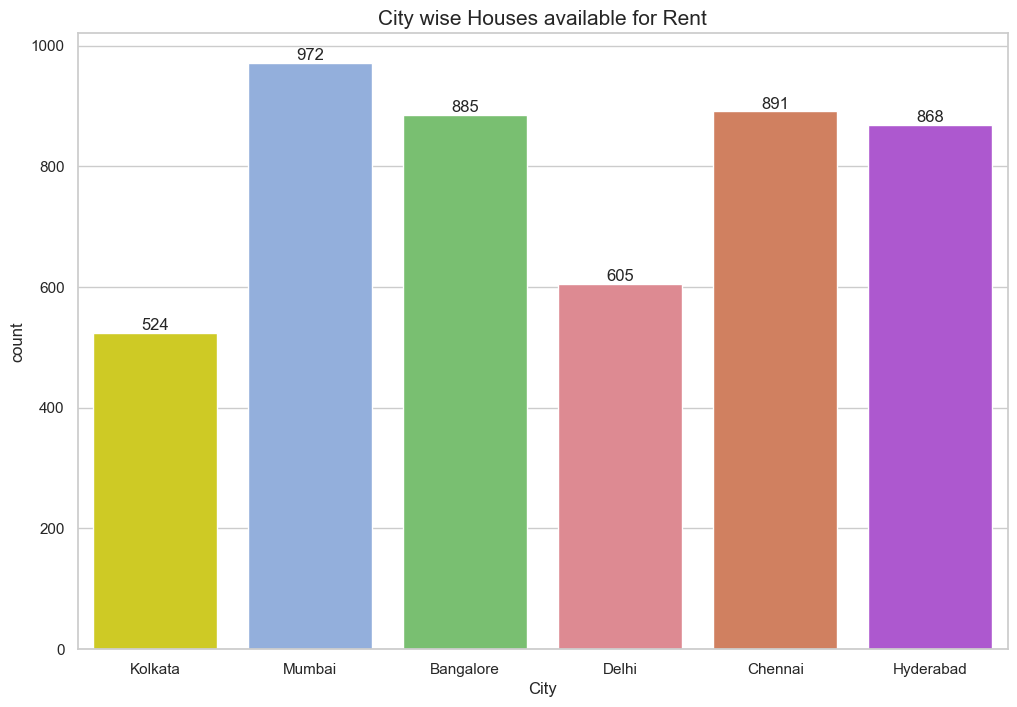

In [ ]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
colors = ['#87ace8','#e3784d', '#6ecc64','#b644e3','#eb7c87', '#EAE509']

ax = sns.countplot(x='City',data=data, palette=['#EAE509','#87ace8', '#6ecc64','#eb7c87','#e3784d','#b644e3'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('City wise Houses available for Rent',fontsize=15)
plt.show()

fig = px.pie(data, names='City', height=700, width= 700, color_discrete_sequence=px.colors.sequential.deep, title='Pie Chart for Houses available for Rent in different cities')
fig.update_traces(textfont_size=15)
fig.show()

AREA TYPE

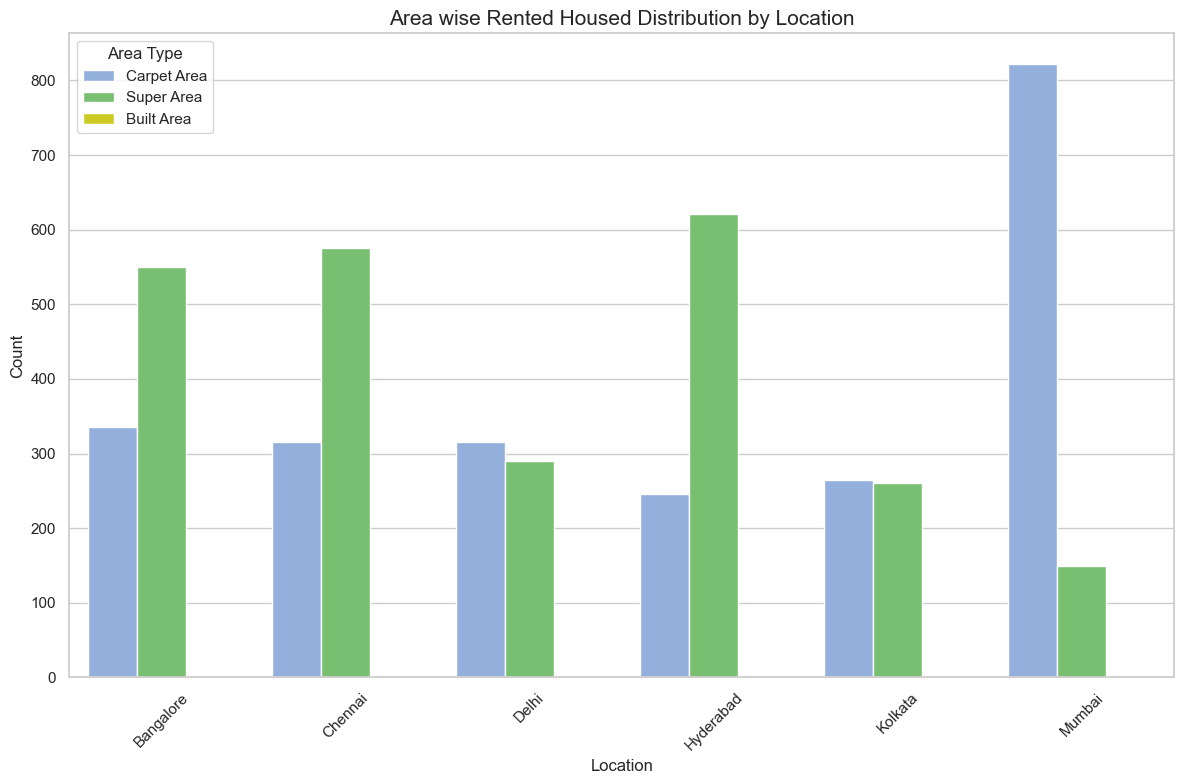

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))

palette = ['#87ace8', '#6ecc64', '#EAE509']
ax = sns.barplot(x='City', y='count', hue='Area Type', data=data.groupby(['City', 'Area Type']).size().reset_index(name='count'), palette=palette)
ax.set_title('Area wise Rented Housed Distribution by Location', fontsize=15)
ax.set_xlabel('Location')
ax.set_ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Area Type')
plt.tight_layout()
plt.show()

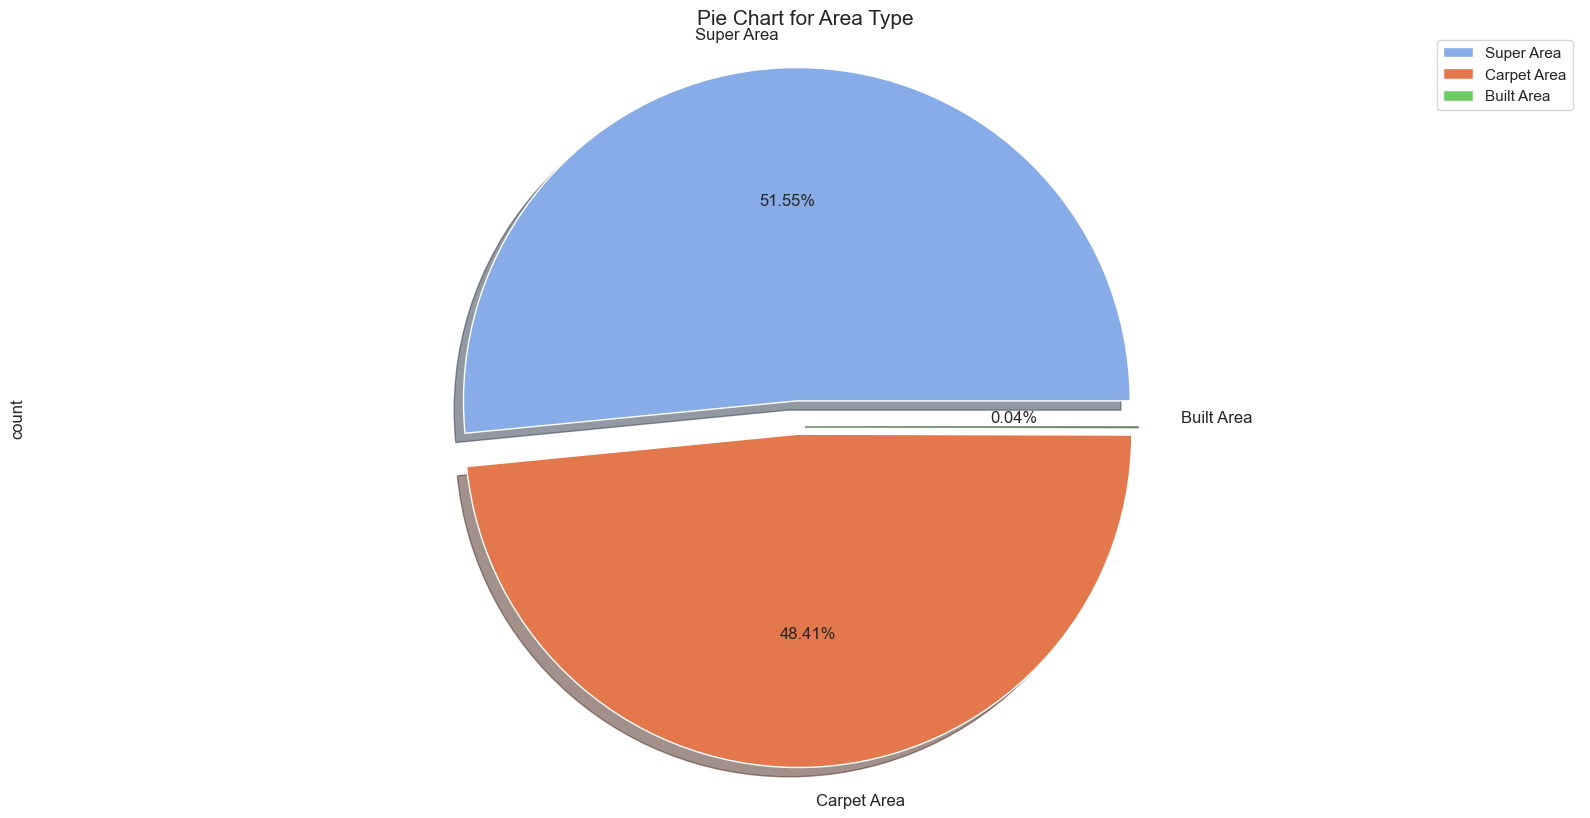

In [ ]:
plt.figure(figsize = (20, 10)) 
data['Area Type'].value_counts().plot.pie(explode=[0.05, 0.05,0.05],textprops={'fontsize': 12}, autopct='%1.2f%%',colors=colors, shadow=True)
plt.title('Pie Chart for Area Type',fontsize=15)
plt.axis('equal')
plt.legend( loc = "best")
plt.show()

POINT OF CONTACT

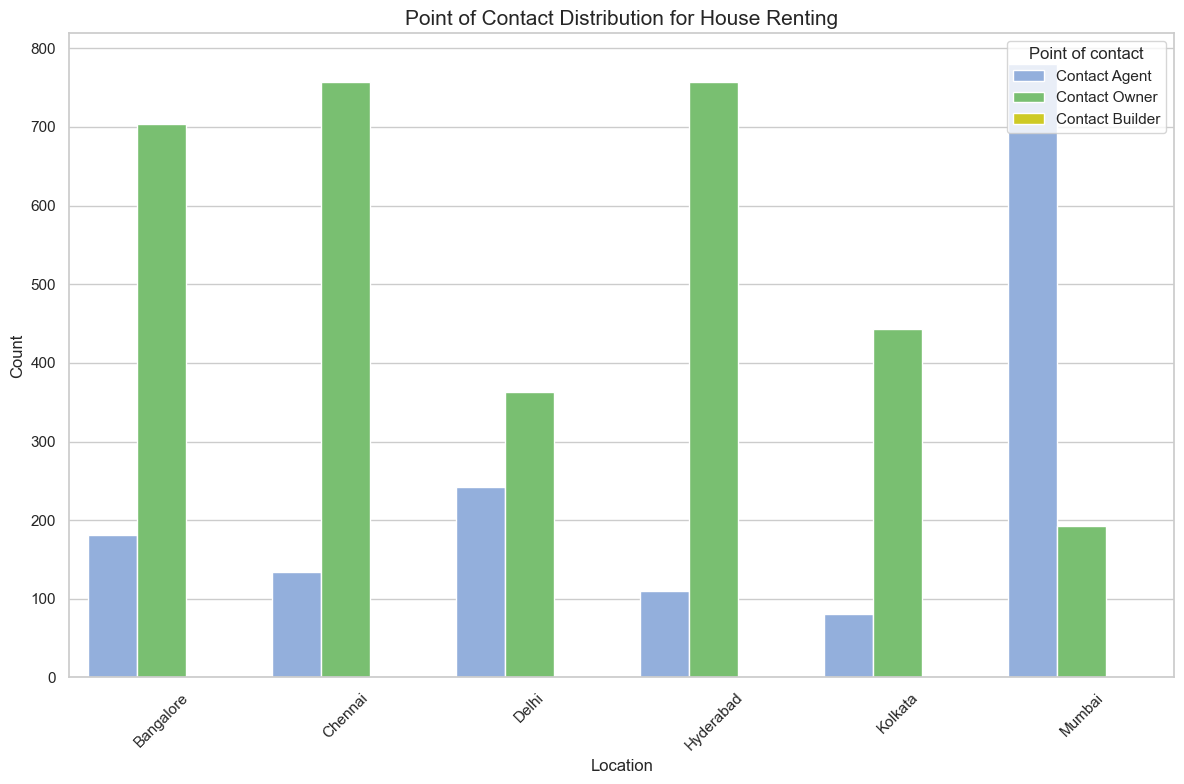

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))

palette = ['#87ace8', '#6ecc64', '#EAE509']
ax = sns.barplot(x='City', y='count', hue='Point of Contact', data=data.groupby(['City', 'Point of Contact']).size().reset_index(name='count'), palette=palette)
ax.set_title('Point of Contact Distribution for House Renting', fontsize=15)
ax.set_xlabel('Location')
ax.set_ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Point of contact')
plt.tight_layout()
plt.show()

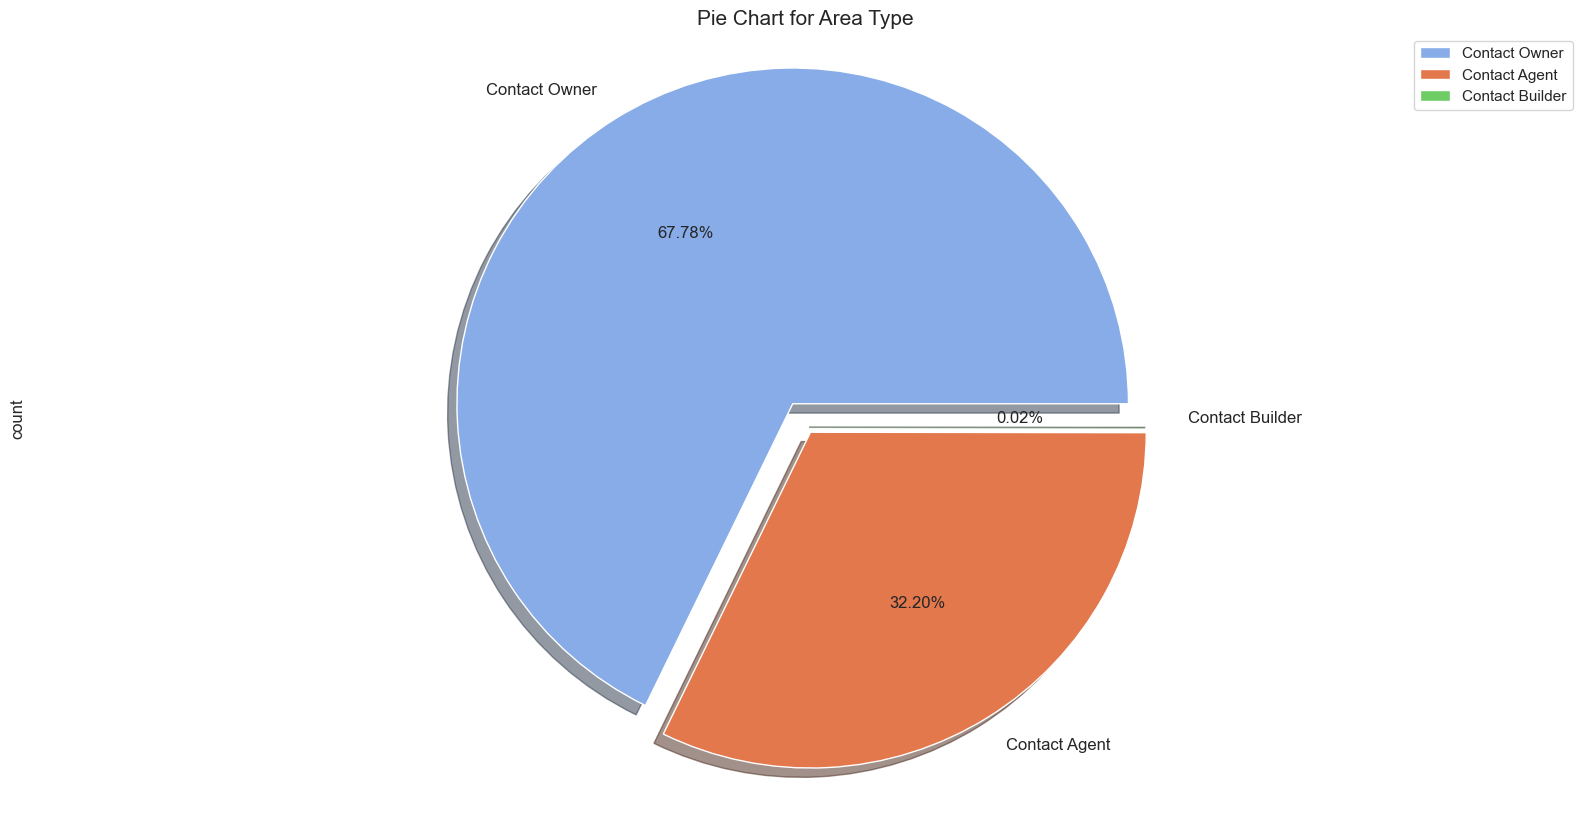

In [ ]:
plt.figure(figsize = (20, 10)) 
data['Point of Contact'].value_counts().plot.pie(explode=[0.05, 0.05,0.05],textprops={'fontsize': 12}, autopct='%1.2f%%',colors=colors, shadow=True)
plt.title('Pie Chart for Area Type',fontsize=15)
plt.axis('equal')
plt.legend( loc = "best")
plt.show()

TENENT PREFERRED

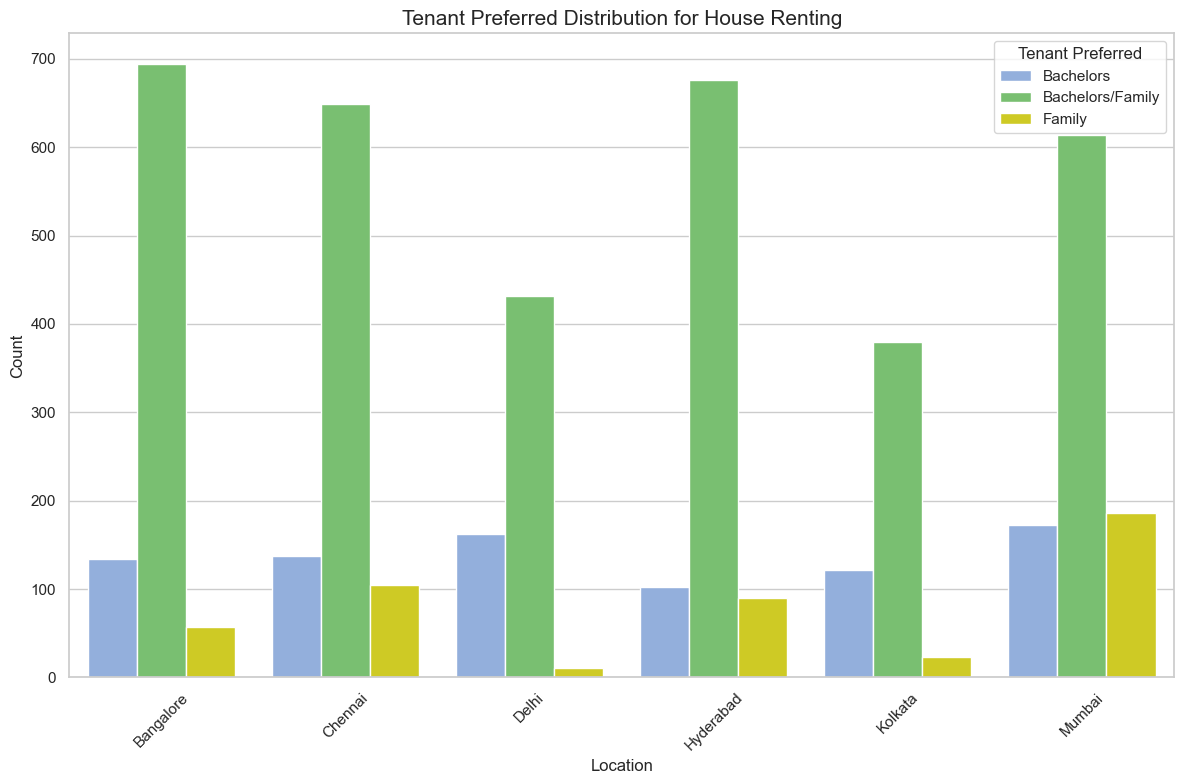

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))

palette = ['#87ace8', '#6ecc64', '#EAE509']
ax = sns.barplot(x='City', y='count', hue='Tenant Preferred', data=data.groupby(['City', 'Tenant Preferred']).size().reset_index(name='count'), palette=palette)
ax.set_title('Tenant Preferred Distribution for House Renting', fontsize=15)
ax.set_xlabel('Location')
ax.set_ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Tenant Preferred')
plt.tight_layout()
plt.show()

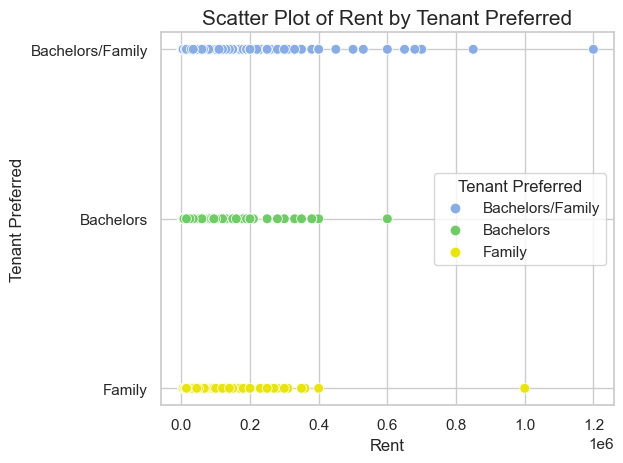

In [ ]:
palette = ['#87ace8', '#6ecc64', '#EAE509']
ax = sns.scatterplot(data=data, x='Rent', y='Tenant Preferred', hue='Tenant Preferred', palette=palette, marker='o', s=50)
ax.set_title('Scatter Plot of Rent by Tenant Preferred', fontsize=15)
ax.set_xlabel('Rent')
ax.set_ylabel('Tenant Preferred')
plt.legend(title='Tenant Preferred')
plt.tight_layout()
plt.show()

FURNISHING STATUS

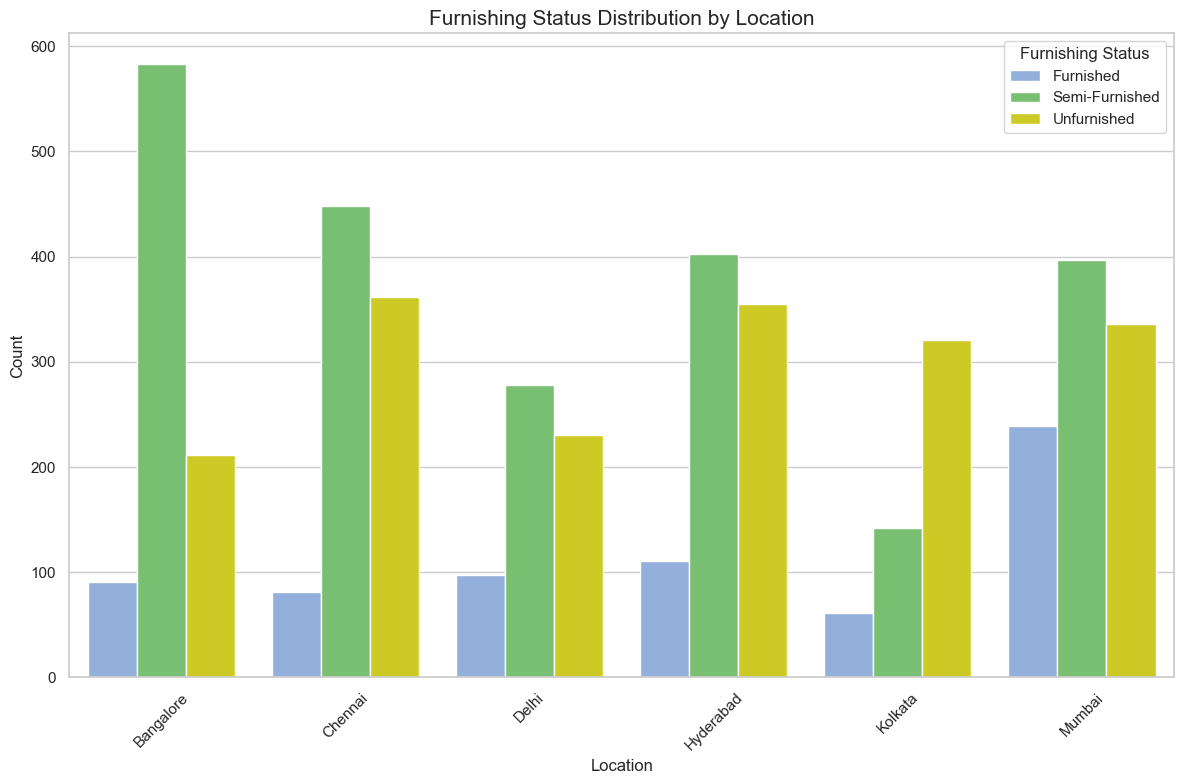

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))

palette = ['#87ace8', '#6ecc64', '#EAE509']
ax = sns.barplot(x='City', y='count', hue='Furnishing Status', data=data.groupby(['City', 'Furnishing Status']).size().reset_index(name='count'), palette=palette)
ax.set_title('Furnishing Status Distribution by Location', fontsize=15)
ax.set_xlabel('Location')
ax.set_ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Furnishing Status')
plt.tight_layout()
plt.show()

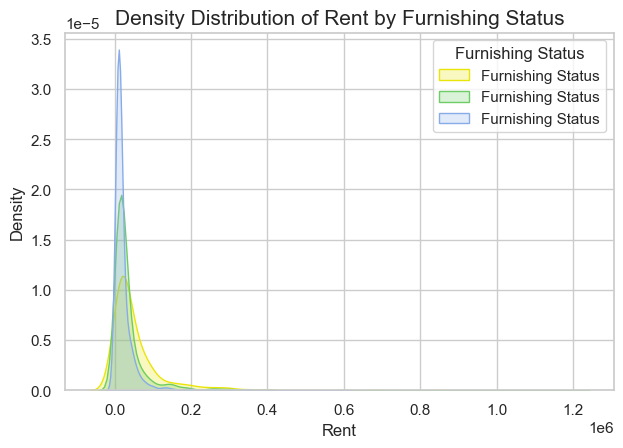

In [ ]:
palette = ['#87ace8', '#6ecc64', '#EAE509']
ax = sns.kdeplot(data=data, x='Rent', hue='Furnishing Status', common_norm=False, fill=True, palette=palette,label='Furnishing Status' )
ax.set_title('Density Distribution of Rent by Furnishing Status', fontsize=15)
ax.set_xlabel('Rent')
ax.set_ylabel('Density')
plt.legend(title='Furnishing Status')
plt.tight_layout()
plt.show()

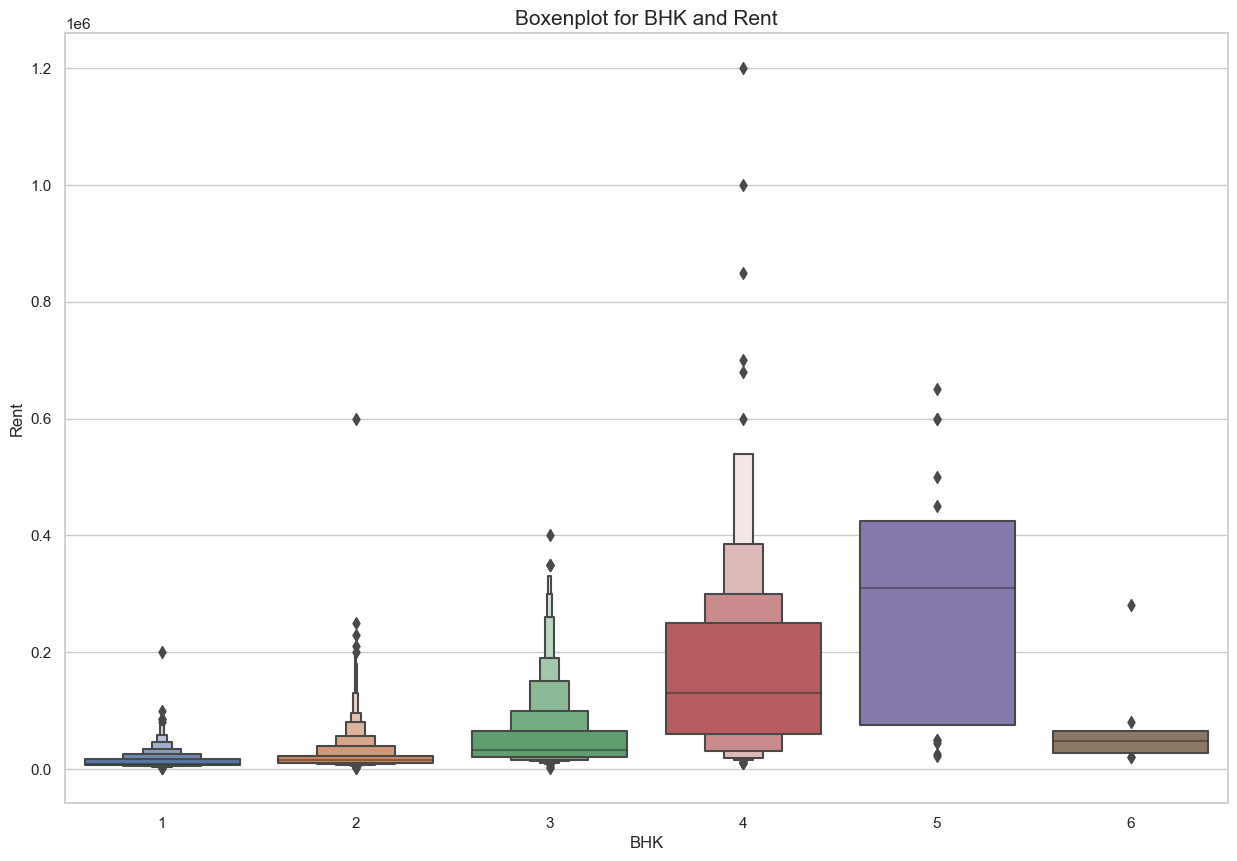

In [ ]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="BHK", y='Rent',data=data)
plt.title('Boxenplot for BHK and Rent',fontsize=15)
plt.show()

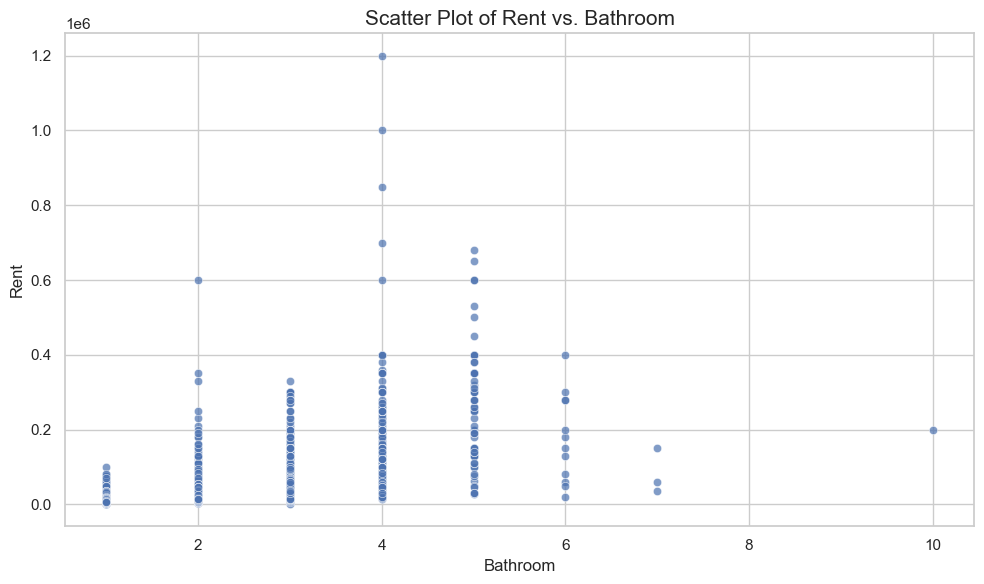

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

sns.scatterplot(x="Bathroom", y="Rent", data=data, alpha=0.7)
plt.title('Scatter Plot of Rent vs. Bathroom', fontsize=15)
plt.xlabel('Bathroom')
plt.ylabel('Rent')

plt.tight_layout()
plt.show()

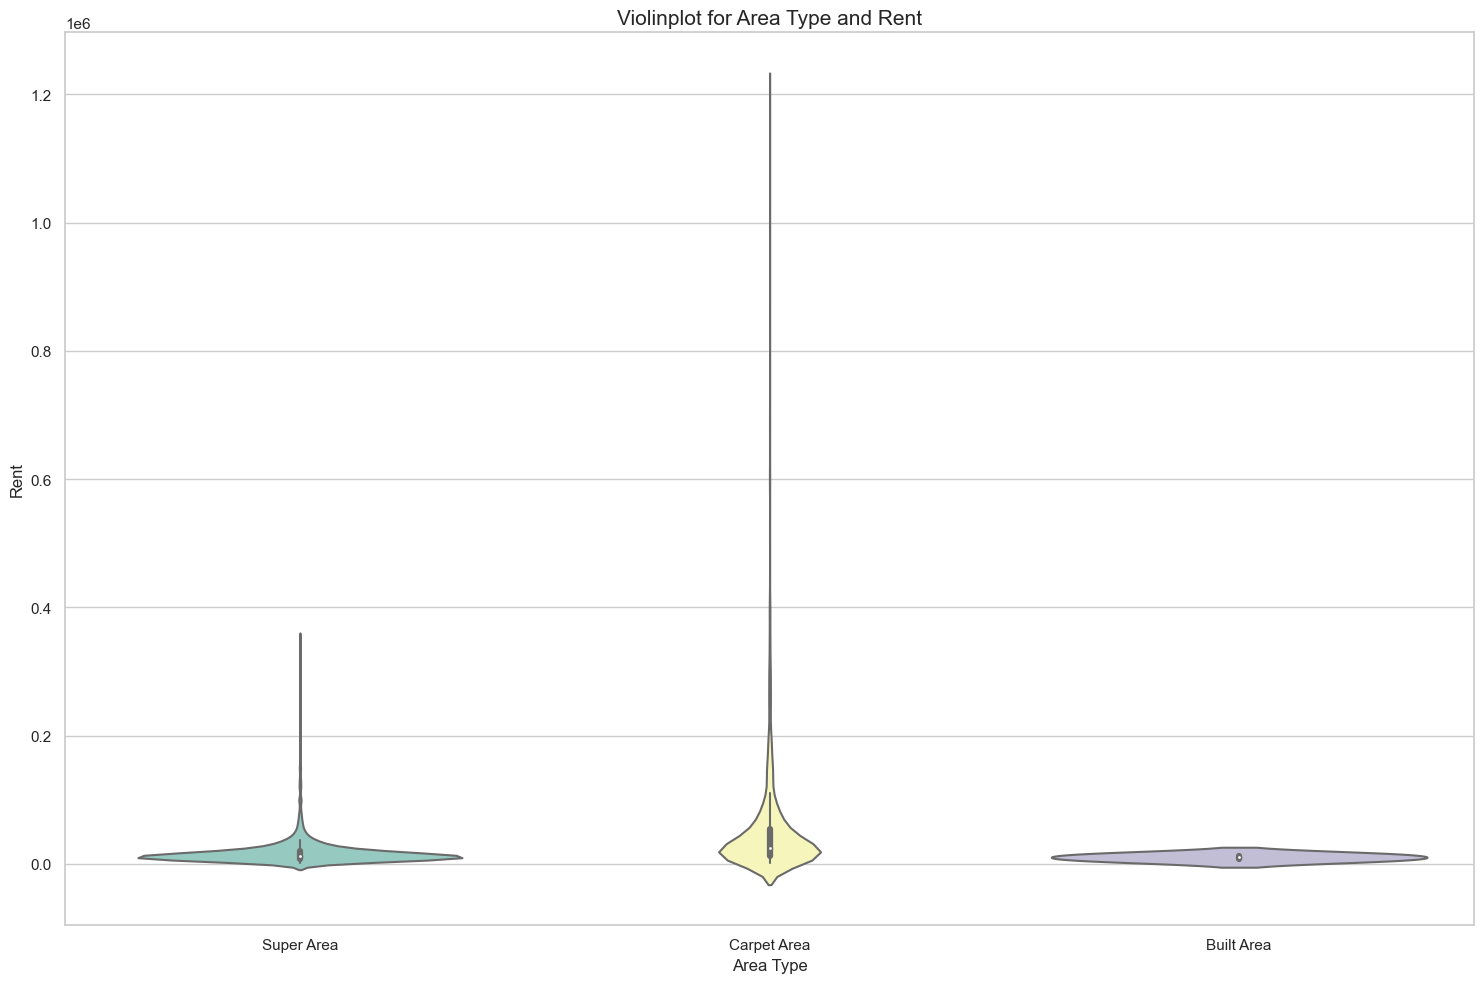

In [ ]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(figsize=(15, 10))


sns.violinplot(x="Area Type", y='Rent', data=data, ax=axes, palette="Set3")
axes.set_title('Violinplot for Area Type and Rent', fontsize=15)
axes.set_xlabel('Area Type')
axes.set_ylabel('Rent')

plt.tight_layout()
plt.show()

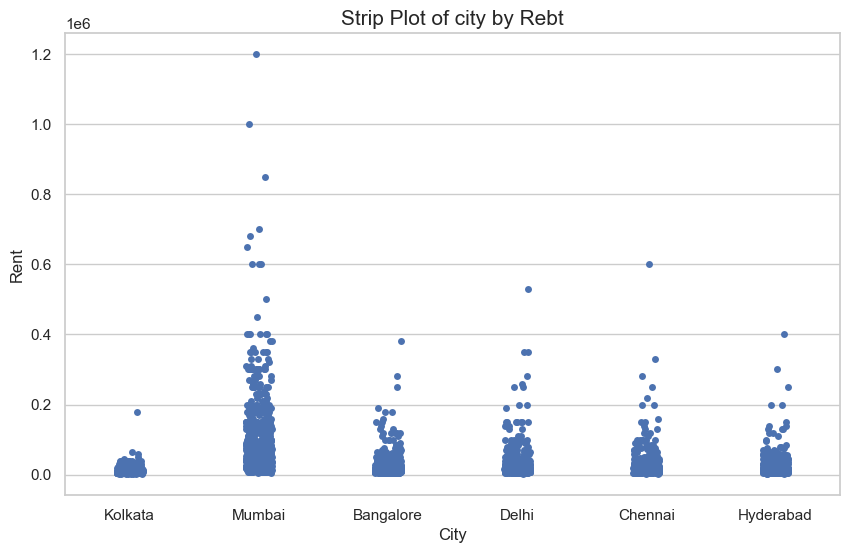

In [ ]:
fig, axes = plt.subplots(figsize=(10, 6))

sns.stripplot(x="City", y="Rent", data=data, ax=axes)
plt.title("Strip Plot of city by Rebt", fontsize=15)

axes.set_xlabel("City", fontsize=12)
axes.set_ylabel("Rent", fontsize=12)

plt.show()

c:\Users\B\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



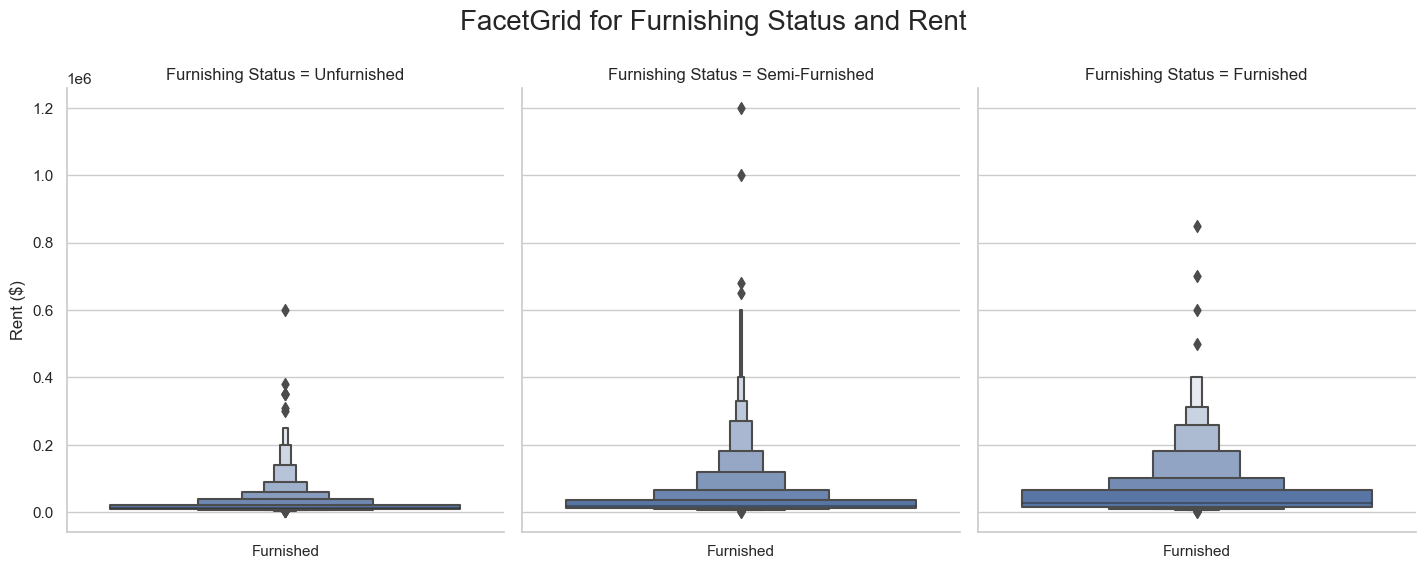

In [ ]:
g = sns.FacetGrid(data, col="Furnishing Status", height=6, aspect=0.8)
g.map_dataframe(sns.boxenplot, x="Furnishing Status", y="Rent")
g.set_titles(col_template="{col_name} Furnishing Status")
g.set_axis_labels("", "Rent ($)")
g.set_titles(fontsize=15)
g.fig.suptitle("FacetGrid for Furnishing Status and Rent", fontsize=20)
g.fig.subplots_adjust(top=0.85)


plt.show()

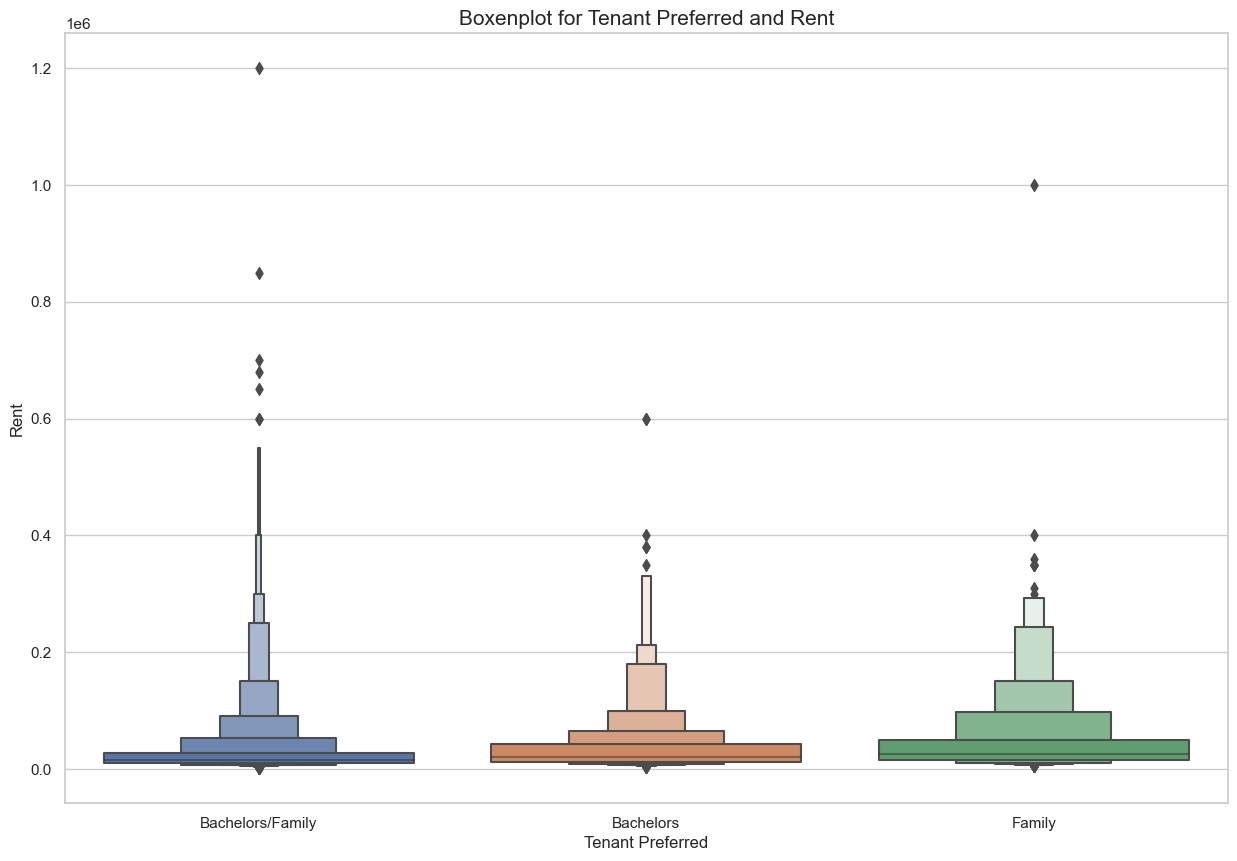

In [ ]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Tenant Preferred", y='Rent',data=data)
plt.title('Boxenplot for Tenant Preferred and Rent',fontsize=15)
plt.show()

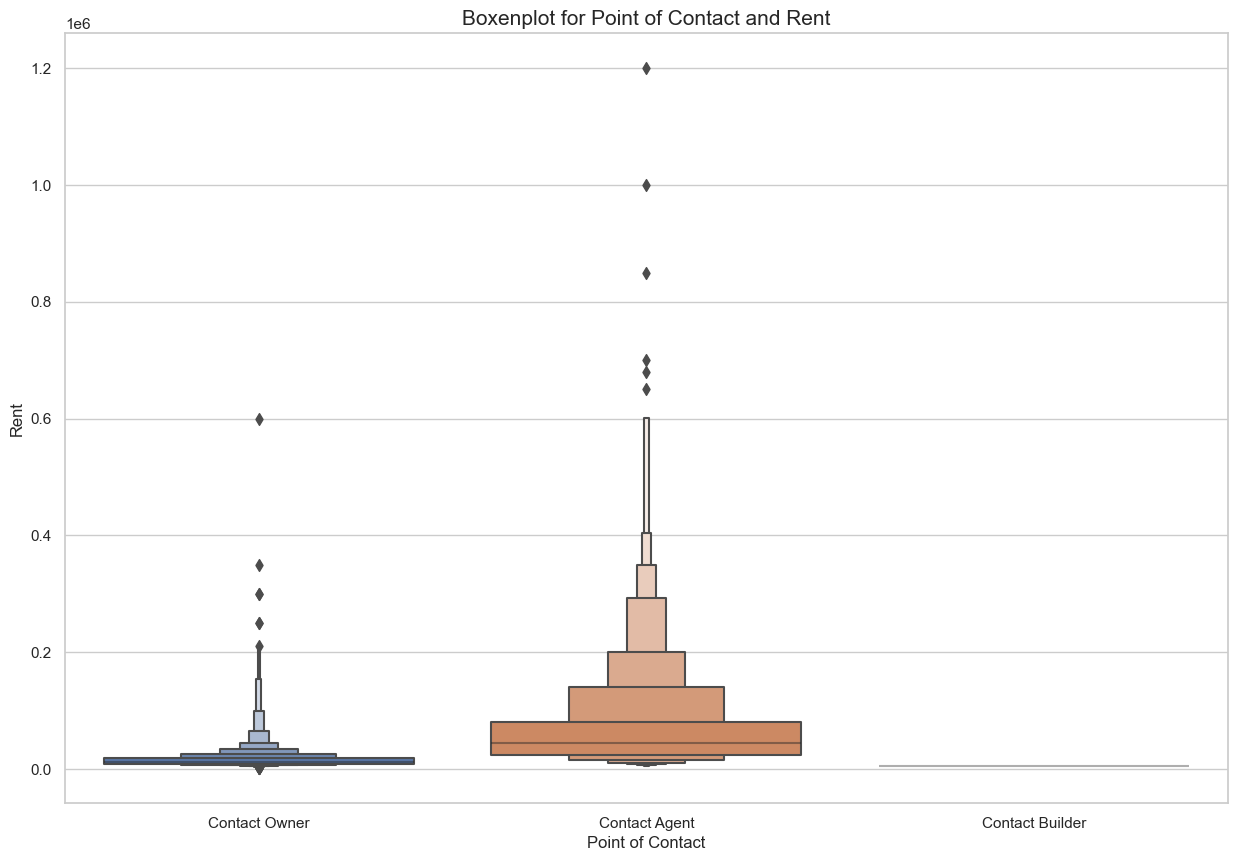

In [ ]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Point of Contact", y='Rent',data=data)
plt.title('Boxenplot for Point of Contact and Rent',fontsize=15)
plt.show()

In [ ]:
fig = px.sunburst(data, path=['City','Area Type', 'Furnishing Status', 'Tenant Preferred'], width=900,
    height=900,title='Allotment of flats according to Bachelors/Family/(Bachelors/Family)',color_discrete_sequence=px.colors.cyclical.Phase)
fig.show()

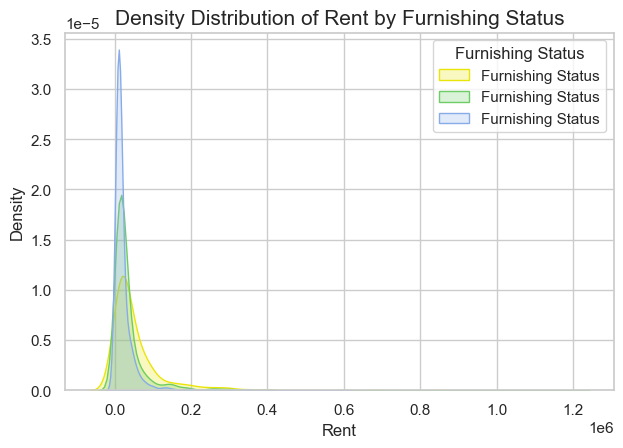

In [ ]:
palette = ['#87ace8', '#6ecc64', '#EAE509']
ax = sns.kdeplot(data=data, x='Rent', hue='Furnishing Status', common_norm=False, fill=True, palette=palette,label='Furnishing Status' )
ax.set_title('Density Distribution of Rent by Furnishing Status', fontsize=15)
ax.set_xlabel('Rent')
ax.set_ylabel('Density')
plt.legend(title='Furnishing Status')
plt.tight_layout()
plt.show()

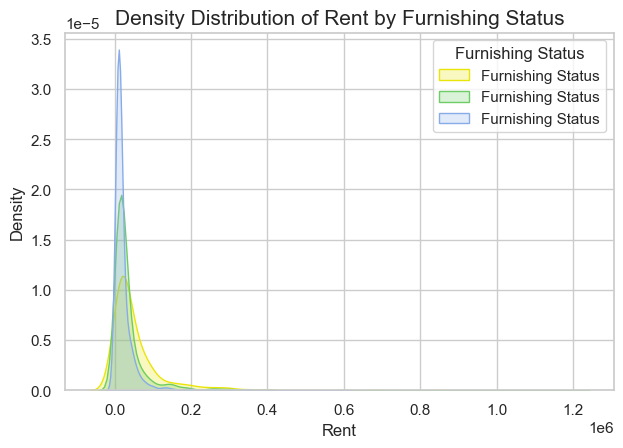

In [ ]:
palette = ['#87ace8', '#6ecc64', '#EAE509']
ax = sns.kdeplot(data=data, x='Rent', hue='Furnishing Status', common_norm=False, fill=True, palette=palette,label='Furnishing Status' )
ax.set_title('Density Distribution of Rent by Furnishing Status', fontsize=15)
ax.set_xlabel('Rent')
ax.set_ylabel('Density')
plt.legend(title='Furnishing Status')
plt.tight_layout()
plt.show()

In [ ]:
from wordcloud import WordCloud

(-0.5, 1499.5, 799.5, -0.5)

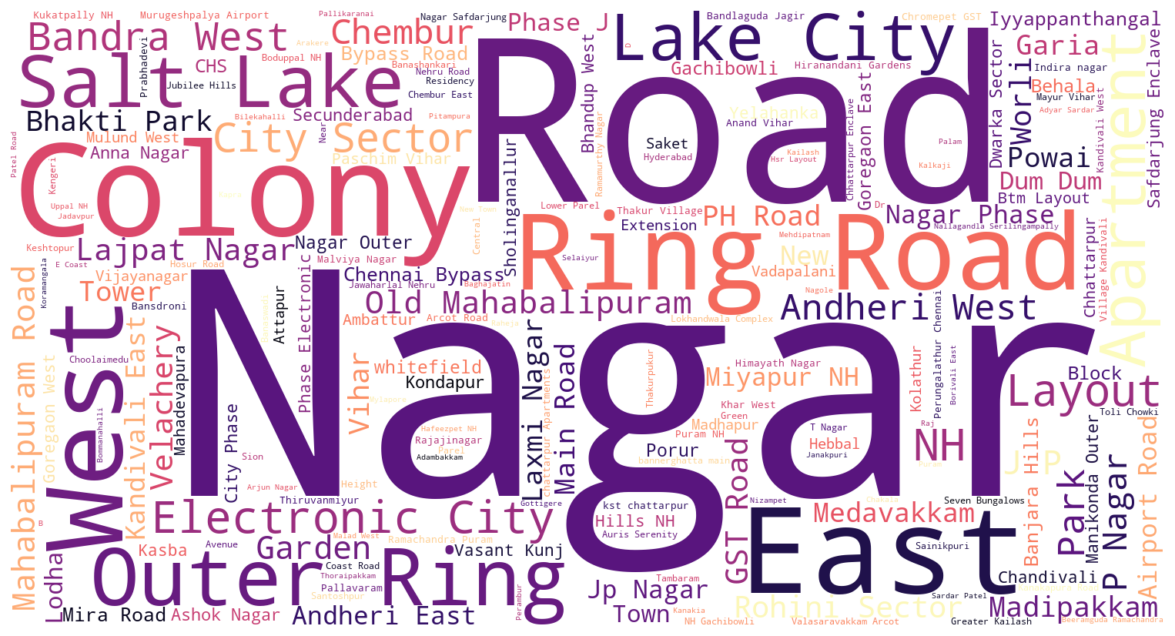

In [ ]:
text = ' '.join(area for area in data['Area Locality'])
wordcloud = WordCloud(background_color='white', max_words=200, width=1500, height=800, colormap='magma').generate(text)

plt.figure(figsize=(32,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')


# Feature Engineering

In [ ]:
data = data.join(data['Floor'].str.split(pat=' out of ', expand=True).rename(columns={0:'Floor Level', 1:'Total Floors'}))
data['Floor Level'] = data.apply(lambda x: 0 if x['Floor Level'] =='Ground' \
                                 else ( -1 if x['Floor Level'] =='Lower Basement' else (x['Total Floors']) ) , axis=1)

data.drop('Floor', axis=1, inplace=True)
data = data.dropna()
data['Floor Level'] = data['Floor Level'].astype(int)
data['Total Floors'] = data['Total Floors'].astype(int)

In [ ]:
data.head()

,Posted On,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor Level,Total Floors
0,2022-05-18,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2
1,2022-05-13,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3,3
2,2022-05-16,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3,3
3,2022-07-04,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2,2
4,2022-05-09,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2,2


In [ ]:
print(data['Point of Contact'].value_counts())

Point of Contact
Contact Owner      3212
Contact Agent      1528
Contact Builder       1
Name: count, dtype: int64


In [ ]:
print(data['Area Type'].value_counts())

Area Type
Super Area     2444
Carpet Area    2295
Built Area        2
Name: count, dtype: int64


In [ ]:
data= data[~data['Point of Contact'].str.contains('Cotact Builder')]

In [ ]:
data['Posted On'] = pd.to_datetime(data['Posted On'])
data['month posted'] = data['Posted On'].dt.month
data['day posted'] = data['Posted On'].dt.day
data['day of week posted'] = data['Posted On'].dt.dayofweek
data['quarter poster'] = data['Posted On'].dt.quarter
data.drop('Posted On', axis=1, inplace=True)

In [ ]:
data.head()

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor Level,Total Floors,month posted,day posted,day of week posted,quarter poster
0,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2,5,18,2,2
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3,3,5,13,4,2
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3,3,5,16,0,2
3,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2,2,7,4,0,3
4,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2,2,5,9,0,2
